In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')

In [3]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [4]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

# EDA

<Axes: xlabel='car purchase amount', ylabel='Count'>

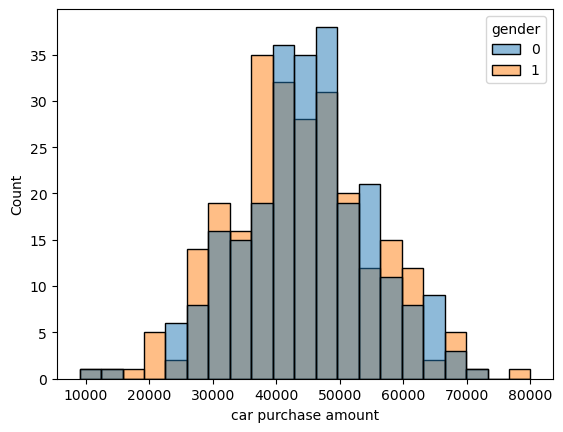

In [6]:
sns.histplot(df,x='car purchase amount',hue='gender')

/Users/karanraturi/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


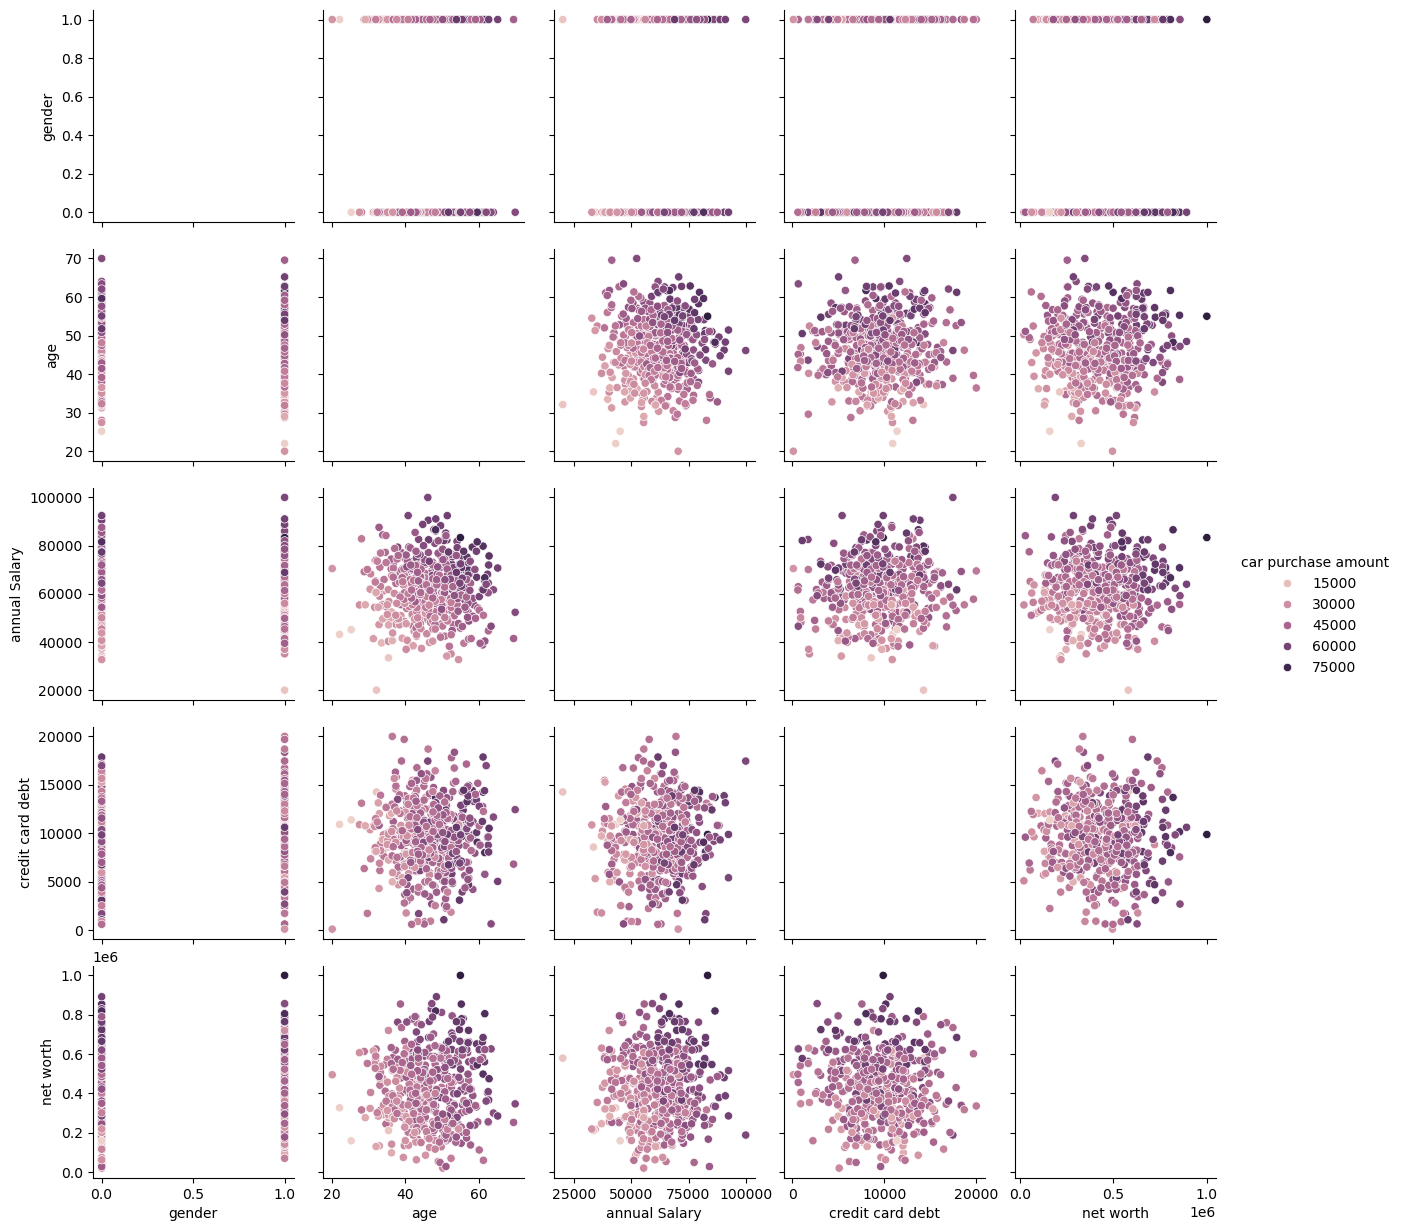

In [7]:
sns.pairplot(df, hue='car purchase amount')

## Does older people spend more on cars

<function matplotlib.pyplot.show(close=None, block=None)>

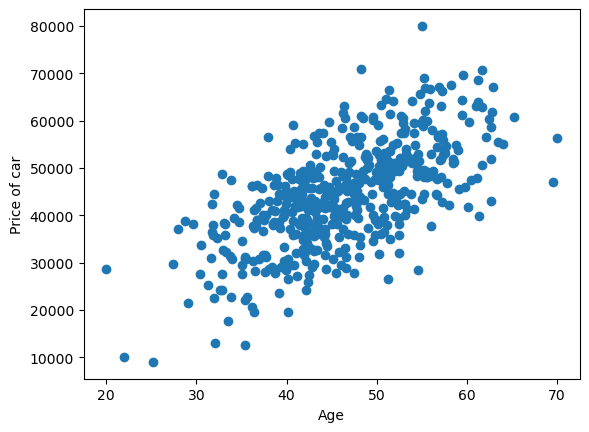

In [8]:
plt.scatter(df["age"],df["car purchase amount"])
plt.xlabel("Age")
plt.ylabel("Price of car")
plt.show

### Top 5 countries which spend the most.

<function matplotlib.pyplot.show(close=None, block=None)>

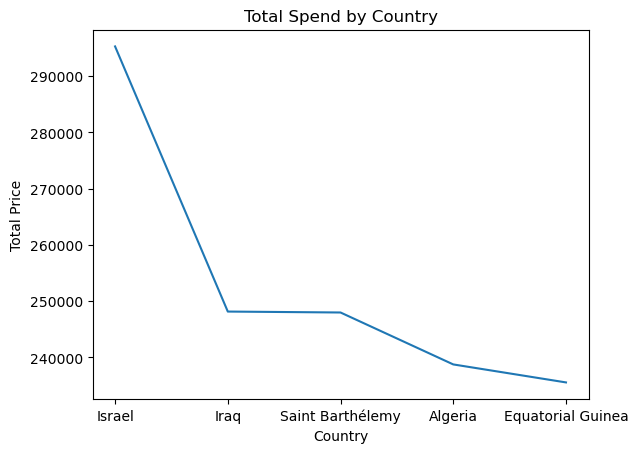

In [9]:
plt.plot(df.groupby('country')['car purchase amount'].sum().sort_values(ascending=False).head())
plt.xlabel("Country")
plt.ylabel("Total Price")
plt.title("Total Spend by Country")
plt.show

### Data Cleaning

In [10]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [11]:
col = ['country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount']

df = df[col]
df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
le = LabelEncoder()

df['country'] = le.fit_transform(df['country'])
df

/var/folders/v9/86zm83nj3012jnyj9hjr0lmw0000gn/T/ipykernel_30039/1389668197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = le.fit_transform(df['country'])


,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,208,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,144,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,24,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


<Axes: >

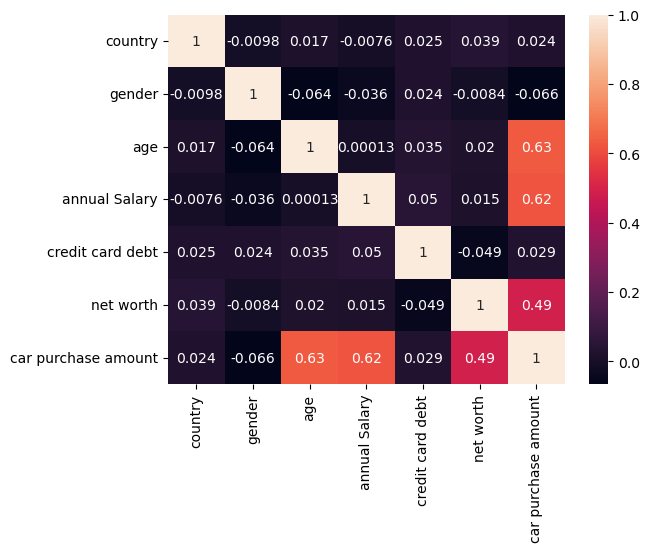

In [14]:
cor = pd.DataFrame(df)
sns.heatmap(cor.corr(), annot = True)

In [15]:
def clean_data(df) :
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    ss = StandardScaler()

    X = ss.fit_transform(X)
    data = np.hstack((X,np.reshape(y,(-1,1))))


    return data,X,y

In [16]:
data,X,y = clean_data(df)

In [17]:
data

array([[-1.25451191e+00, -1.01207287e+00, -5.50749111e-01, ...,
         5.74271326e-01, -1.11046945e+00,  3.53214588e+04],
       [-1.42027285e+00, -1.01207287e+00, -6.73834215e-01, ...,
        -9.95149958e-03,  5.73929374e-01,  4.51155257e+04],
       [-1.68549034e+00,  9.88071144e-01, -3.87507679e-01, ...,
         4.45451798e-01,  1.19397625e+00,  4.29257092e+04],
       ...,
       [ 6.84891032e-01,  9.88071144e-01,  9.66245154e-01, ...,
         2.88023256e-01,  1.92114437e+00,  6.41472889e+04],
       [-1.30424019e+00,  9.88071144e-01,  1.62075409e+00, ...,
         1.26384749e+00, -5.40190258e-01,  4.54421535e+04],
       [ 1.76233711e+00,  9.88071144e-01,  6.14083154e-02, ...,
        -6.20545671e-02,  1.81530977e-01,  4.51072257e+04]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.6)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression()

In [22]:
y_pred = linreg.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

2.522024736154926 0.9999999781006138


In [23]:
import tensorflow as tf

In [24]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape =(6,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')                    
     ])

2025-08-11 02:07:35.872309: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-08-11 02:07:35.872341: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-11 02:07:35.872347: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-08-11 02:07:35.872422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-11 02:07:35.872625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss = 'mse', metrics = ['mse'])

In [26]:
history = nn_model.fit(X_train, y_train, epochs = 500, batch_size = 10, validation_split = 0.2)

Epoch 1/500
 1/16 [>.............................] - ETA: 3s - loss: 2495591168.0000 - mse: 2495591168.0000

2025-08-11 02:07:37.194910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 9ms/step - loss: 1995972224.0000 - mse: 1995972224.0000 - val_loss: 2093374720.0000 - val_mse: 2093374720.0000
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 1995945216.0000 - mse: 1995945216.0000 - val_loss: 2093352960.0000 - val_mse: 2093352960.0000
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 1995902720.0000 - mse: 1995902720.0000 - val_loss: 2093318912.0000 - val_mse: 2093318912.0000
Epoch 4/500
 1/16 [>.............................] - ETA: 0s - loss: 1957600512.0000 - mse: 1957600512.0000

2025-08-11 02:07:37.412490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 4ms/step - loss: 1995833344.0000 - mse: 1995833344.0000 - val_loss: 2093264128.0000 - val_mse: 2093264128.0000
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 1995745024.0000 - mse: 1995745024.0000 - val_loss: 2093178496.0000 - val_mse: 2093178496.0000
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 1995600128.0000 - mse: 1995600128.0000 - val_loss: 2093044096.0000 - val_mse: 2093044096.0000
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 1995370752.0000 - mse: 1995370752.0000 - val_loss: 2092851584.0000 - val_mse: 2092851584.0000
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 1995069056.0000 - mse: 1995069056.0000 - val_loss: 2092575488.0000 - val_mse: 2092575488.0000
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 1994648192.0000 - mse: 1994647936.0000 - val_loss: 2092194176.0000 - val_mse: 2092194176.0000
Epoch 10/5

In [27]:
y_pred = nn_model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


2025-08-11 02:08:10.058869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [28]:
print(mean_squared_error(y_pred, y_test), r2_score(y_pred, y_test))

2.493921554904843 0.9999999783441964


In [29]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'MSE per Epoch')

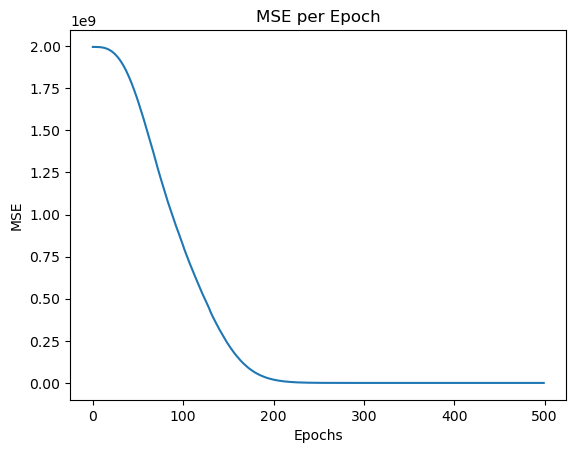

In [30]:
sns.lineplot(history.history['mse'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE per Epoch')